### Added 10% of duplicates 

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import duplicates_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

duplicates_utils.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
duplicates_utils.print_duplicates_values(df) 

print(f'\nADDING 10% TO FEATURE \n')

df = duplicates_utils.replace_duplicates_values(df, 10)
duplicates_utils.print_duplicates_values(df)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 10% TO FEATURE 

Number of rows:  9984
Duplicate Counts:  998
Percentage of Duplicate Values:  9.995993589743591


## Decision Tree


--- Prestazioni del modello Decision Tree applicato al set di Test: 

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1539
           1       0.80      0.93      0.86      1457

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1541
           1       0.82      0.93      0.87      1455

    accuracy                           0.87      2996
   macro avg       0.87      0.87      0.87      2996
weighted avg       0.87      0.87      0.87      2996

Node Labels:
 Annotation(0.634077, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6988\nvalue = [3470.0, 3518.0]\nclass = 1')


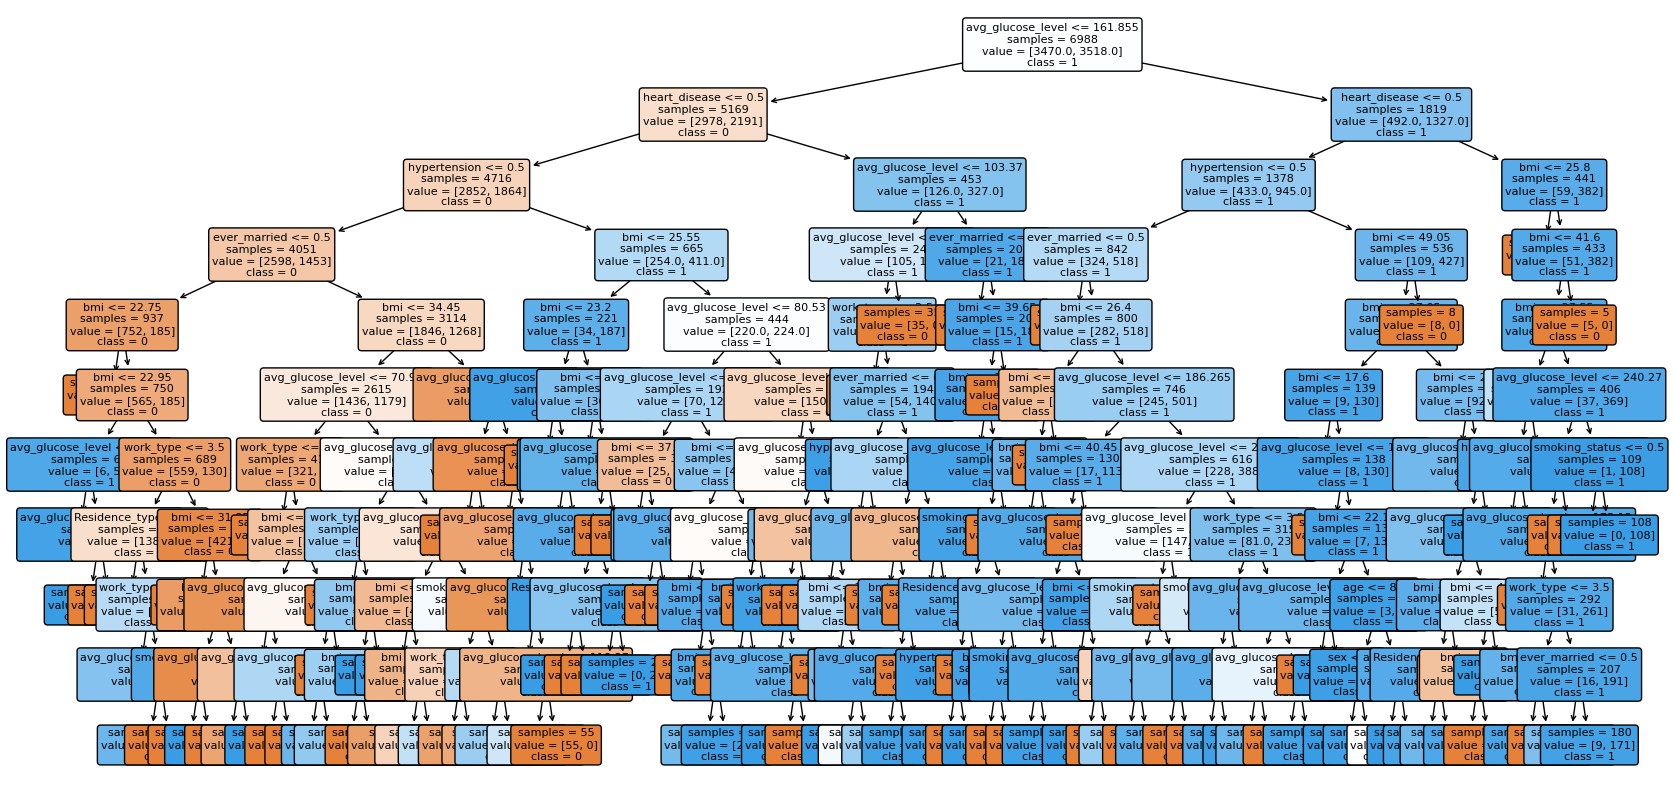

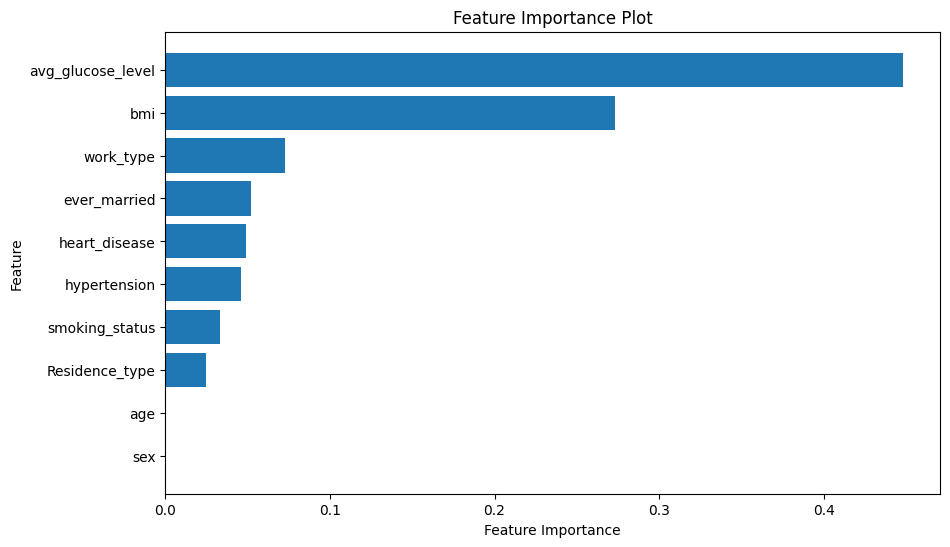

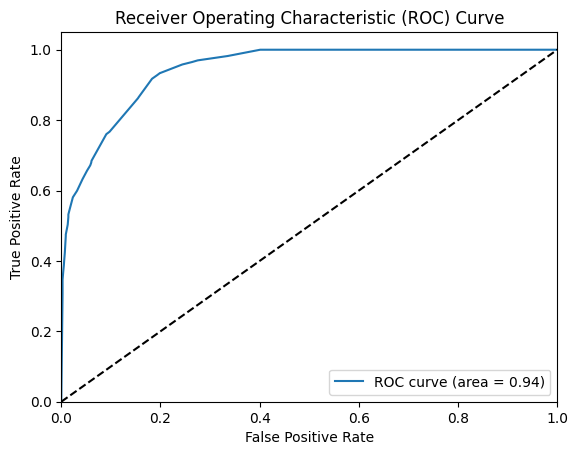

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9429700444438497
Accuracy for each fold: [0.8433333333333334, 0.8266666666666667, 0.8, 0.8533333333333334, 0.79, 0.8, 0.8260869565217391, 0.8294314381270903, 0.8160535117056856, 0.8160535117056856]
Mean accuracy: 0.8200958751393534
95% confidence interval: (0.8058743178008084, 0.8343174324778985)


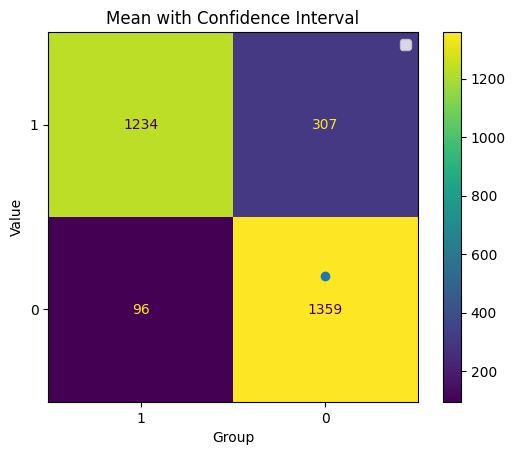

In [3]:
decision_tree = ML_algorithms.model_dt(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df)

## Support Vector Machine

Classification Report on Dirty Test Set:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1539
           1       0.74      0.58      0.65      1457

    accuracy                           0.70      2996
   macro avg       0.70      0.69      0.69      2996
weighted avg       0.70      0.70      0.69      2996

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.79      0.72      1541
           1       0.72      0.56      0.63      1455

    accuracy                           0.68      2996
   macro avg       0.69      0.68      0.67      2996
weighted avg       0.69      0.68      0.67      2996



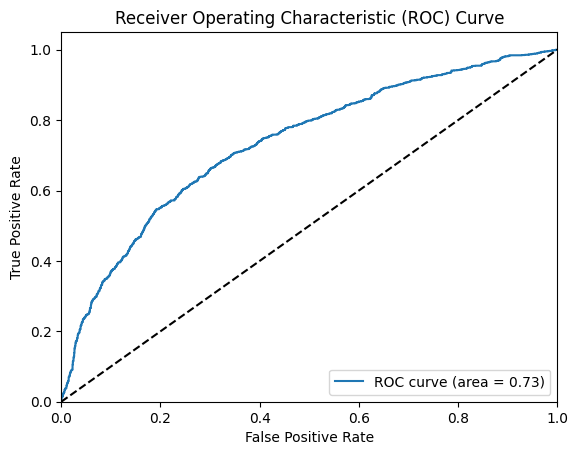

AUC Score: 0.733803416802139


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6966666666666667, 0.6766666666666666, 0.65, 0.7266666666666667, 0.6566666666666666, 0.7333333333333333, 0.6187290969899666, 0.6688963210702341, 0.725752508361204, 0.5652173913043478]
Mean accuracy: 0.6718595317725752
95% confidence interval: (0.6339773943334004, 0.70974166921175)


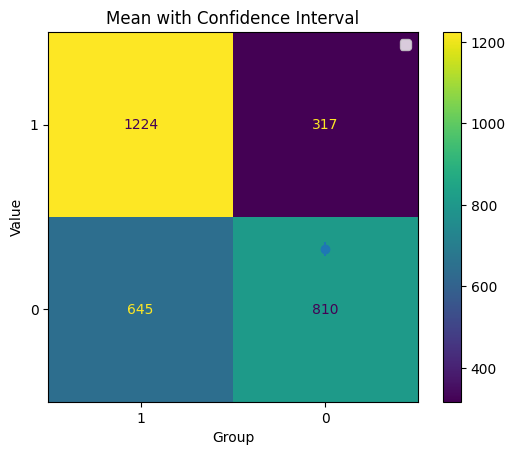

--------------------------------------


In [4]:
svm = ML_algorithms.model_svm(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm,df)

print('--------------------------------------')